## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Network Traffic
**Steps**:
1. Extract Features from Dataset:
    - Load `network_traffic.csv` .
2. Isolation Forest Model
3. Display Anomalies

🔄 Generating network traffic data...
✅ Data generation complete. Sample rows:
            timestamp  packet_size  duration  connection_count  \
0 2025-01-01 00:00:00   524.835708  0.091651                 7   
1 2025-01-01 00:01:00   493.086785  0.055224                 5   
2 2025-01-01 00:02:00   532.384427  0.505892                13   
3 2025-01-01 00:03:00   576.151493  0.612897                10   
4 2025-01-01 00:04:00   488.292331  0.016048                16   

   bytes_per_connection  
0             65.604463  
1             82.181131  
2             38.027459  
3             52.377408  
4             28.723078  
🚀 Running anomaly detection...
📊 Plotting results...


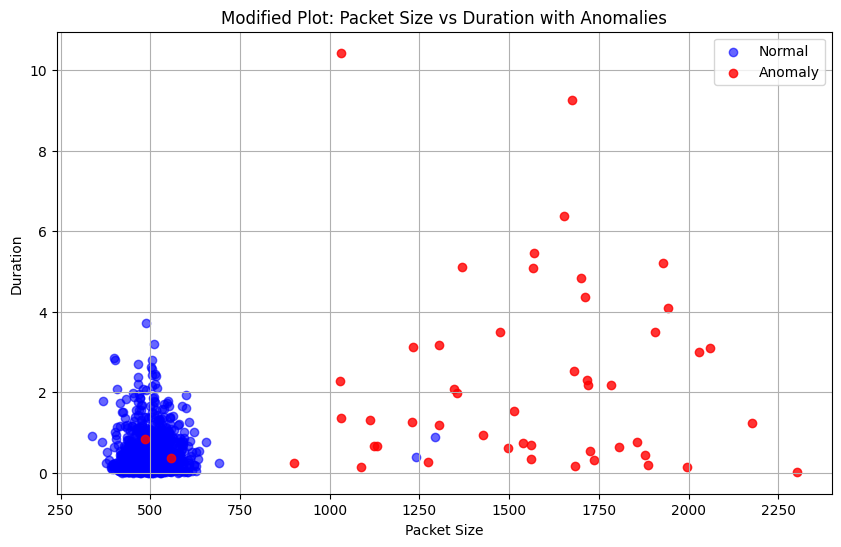

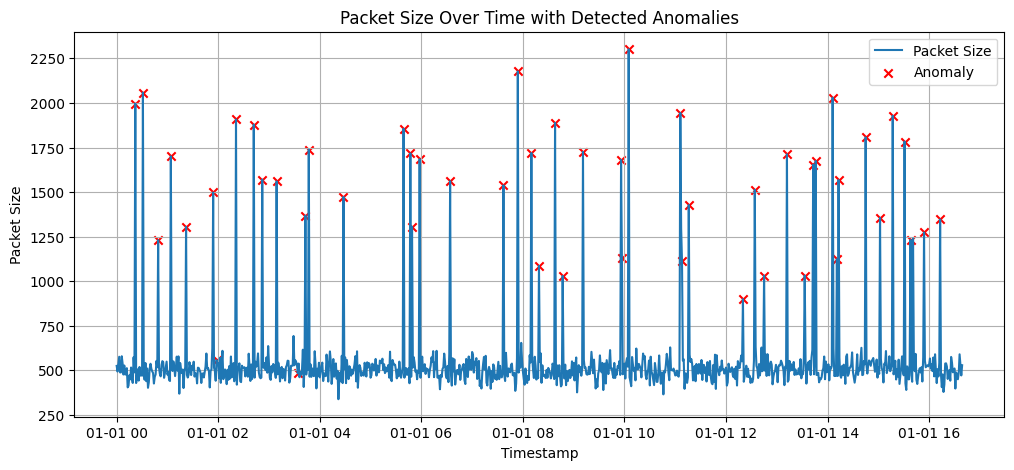

✅ Anomaly detection complete. Total anomalies found: 50


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Generate synthetic network traffic data
def generate_network_data(n_samples=1000, seed=42):
    np.random.seed(seed)
    timestamps = pd.date_range(start="2025-01-01", periods=n_samples, freq='T')
    packet_size = np.random.normal(loc=500, scale=50, size=n_samples)
    duration = np.random.exponential(scale=0.5, size=n_samples)
    connection_count = np.random.poisson(lam=10, size=n_samples)

    # Inject anomalies
    anomaly_indices = np.random.choice(n_samples, size=50, replace=False)
    packet_size[anomaly_indices] *= np.random.uniform(2, 4, size=50)
    duration[anomaly_indices] *= np.random.uniform(3, 6, size=50)
    connection_count[anomaly_indices] += np.random.randint(20, 100, size=50)

    df = pd.DataFrame({
        'timestamp': timestamps,
        'packet_size': packet_size,
        'duration': duration,
        'connection_count': connection_count
    })

    # ✅ Custom feature: bytes per connection
    df['bytes_per_connection'] = df['packet_size'] / (df['connection_count'] + 1)
    return df

# 2. Apply Isolation Forest
def detect_anomalies(df, contamination=0.05):
    features = ['packet_size', 'duration', 'connection_count', 'bytes_per_connection']
    model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    df['anomaly'] = model.fit_predict(df[features])
    return df

# 3. Plotting results
def plot_network_anomalies(df):
    normal = df[df['anomaly'] == 1]
    anomalous = df[df['anomaly'] == -1]

    # Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(normal['packet_size'], normal['duration'], color='blue', alpha=0.6, label='Normal')
    plt.scatter(anomalous['packet_size'], anomalous['duration'], color='red', alpha=0.8, label='Anomaly')
    plt.xlabel("Packet Size")
    plt.ylabel("Duration")
    plt.title("Modified Plot: Packet Size vs Duration with Anomalies")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Time-Series Plot
    plt.figure(figsize=(12, 5))
    plt.plot(df['timestamp'], df['packet_size'], label='Packet Size')
    plt.scatter(anomalous['timestamp'], anomalous['packet_size'], color='red', marker='x', label='Anomaly')
    plt.xlabel("Timestamp")
    plt.ylabel("Packet Size")
    plt.title("Packet Size Over Time with Detected Anomalies")
    plt.legend()
    plt.grid(True)
    plt.show()

# 4. Main Execution
def main():
    print("🔄 Generating network traffic data...")
    df = generate_network_data()
    print("✅ Data generation complete. Sample rows:")
    print(df.head())

    print("🚀 Running anomaly detection...")
    df = detect_anomalies(df)

    print("📊 Plotting results...")
    plot_network_anomalies(df)

    total_anomalies = (df['anomaly'] == -1).sum()
    print(f"✅ Anomaly detection complete. Total anomalies found: {total_anomalies}")

# Run it!
if __name__ == "__main__":
    main()
